In [1]:
import sys
sys.path.append('..')
sys.path.append('../src')
sys.path.append('../data')

# from src.ablate_heads import Ablate, AblateMultiLen, OVCircuit
from src.experiment import AblateMultiLen, OVCircuit, AttentionPattern, AblateMLP
from src.dataset import TlensDataset  # noqa: E402
# from src.dataset import MyDataset
from src.model import WrapHookedTransformer

from src.myplot import plot_heatmaps, barplot_head
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import einops

torch.set_grad_enabled(False)
%load_ext autoreload
%autoreload 2

/home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = WrapHookedTransformer.from_pretrained("gpt2")
dataset = TlensDataset("../data/full_data_sampled_gpt2.json", model)

Using pad_token, but it is not set yet.


Loaded pretrained model gpt2 into HookedTransformer
Dataset loaded from ../data/full_data_sampled_gpt2.json
Number of samples: 10000


# MLP

In [3]:
ablator = AblateMLP(dataset, model, 20)

In [4]:
mlp_mem, mlp_cp = ablator.ablate_multi_len(target="mlp")

Ablating examples of length 25 ...


Ablating batches:  12%|█▎        | 6/48 [05:04<35:33, 50.80s/it]


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_128009/1558290554.py:1 in <module>                                         │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_128009/1558290554.py'                │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ablate.p │
│ y:486 in ablate_multi_len                                                                 │
│                                                                                           │
│   483 │   │   result_mem_per_len = {}                                                     │
│   484 │   │   for l in lenghts:                                                           │
│   485 │   │   │   print("Ablating examples of length", l, "...")                          │
│ ❱ 486 │   │   │   mem, cp = self.ablate_single_len(l,target)                              │
│   487 │   │   │   if mem is not None and cp is not None:                                  │
│   488 │   │   │   │   result_mem_per_len[l], result_cp_per_len[l] = mem, cp               │
│   489 │   │   # concatenate the results                                                   │
│                                                                                           │
│ /home/francesco/Repository/Competition_of_Mechanisms/notebooks/../src/experiment/ablate.p │
│ y:436 in ablate_single_len                                                                │
│                                                                                           │
│   433 │   │   │   │   │                                                                   │
│   434 │   │   │   │   │   list_hooks = list(tmp_hooks.values())                           │
│   435 │   │   │   │   │   self.model.reset_hooks()                                        │
│ ❱ 436 │   │   │   │   │   logit = self.model.run_with_hooks( # type: ignore               │
│   437 │   │   │   │   │   │   batch["corrupted_prompts"],                                 │
│   438 │   │   │   │   │   │   fwd_hooks=list_hooks,                                       │
│   439 │   │   │   │   │   )[:, -1, :]                                                     │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/transformer_lens/hook_p │
│ oints.py:379 in run_with_hooks                                                            │
│                                                                                           │
│   376 │   │   with self.hooks(                                                            │
│   377 │   │   │   fwd_hooks, bwd_hooks, reset_hooks_end, clear_contexts                   │
│   378 │   │   ) as hooked_model:                                                          │
│ ❱ 379 │   │   │   return hooked_model.forward(*model_args, **model_kwargs)                │
│   380 │                                                                                   │
│   381 │   def add_caching_hooks(                                                          │
│   382 │   │   self,                                                                       │
│                                                                                           │
│ /home/francesco/anaconda3/envs/torch/lib/python3.10/site-packages/transformer_lens/Hooked │
│ Transformer.py:480 in forward                                                             │
│                                                                                           │
│    477 │   │   │   │   │   │   devices.get_device_for_block_index(i, self.cfg)            │
│    478 │   │   │   │   │   )                      

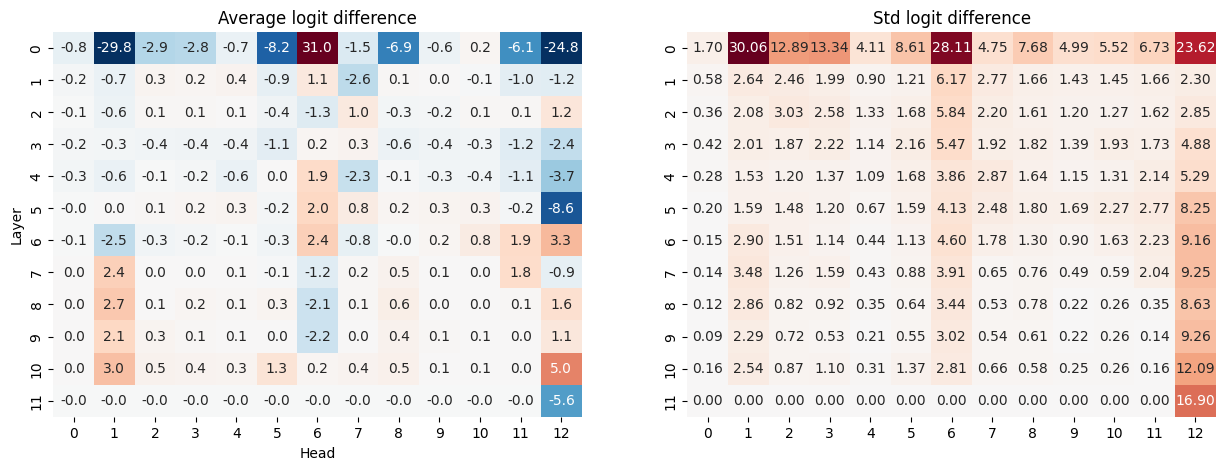

In [5]:
plot_heatmaps(mlp_mem.mean(0), mlp_mem.std(0), title="MLP", interval=10)

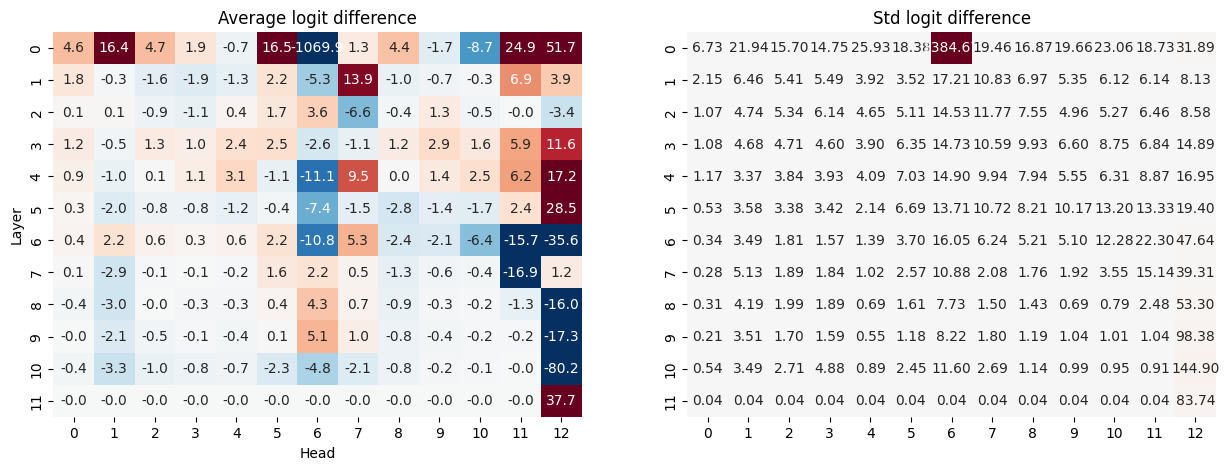

In [6]:
plot_heatmaps(mlp_cp.mean(0), mlp_cp.std(0), title="MLP", interval=15)

## Attention

In [ ]:
attn_mem, attn_cp = ablator.ablate_multi_len(target="attn")

Ablating examples of length 25 ...


Ablating batches: 100%|██████████| 1/1 [00:20<00:00, 20.56s/it]


Ablating examples of length 21 ...


Ablating batches: 100%|██████████| 5/5 [01:16<00:00, 15.32s/it]


Ablating examples of length 19 ...


Ablating batches: 100%|██████████| 6/6 [01:17<00:00, 12.84s/it]


Ablating examples of length 23 ...


Ablating batches: 100%|██████████| 2/2 [00:37<00:00, 18.89s/it]


Ablating examples of length 17 ...


Ablating batches: 100%|██████████| 3/3 [00:32<00:00, 10.97s/it]


Ablating examples of length 27 ...


Ablating batches: 100%|██████████| 1/1 [00:25<00:00, 25.09s/it]


Ablating examples of length 29 ...


Ablating batches: 100%|██████████| 1/1 [00:29<00:00, 29.39s/it]

Ablating examples of length 31 ...
Ablating examples of length 33 ...
Ablating examples of length 43 ...
Ablating examples of length 37 ...
Ablating examples of length 35 ...
Ablating examples of length 69 ...
Ablating examples of length 15 ...
Ablating examples of length 49 ...


In [ ]:
torch.save(mlp_mem, "../results/mlp_mem.pt")
torch.save(mlp_cp, "../results/mlp_cp.pt")
torch.save(attn_mem, "../results/attn_mem.pt")
torch.save(attn_cp, "../results/attn_cp.pt")

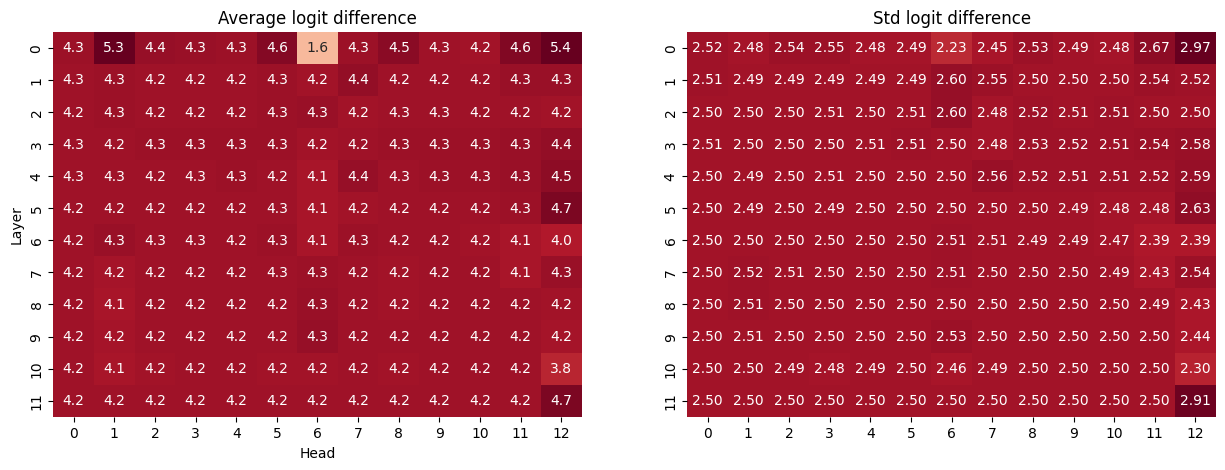

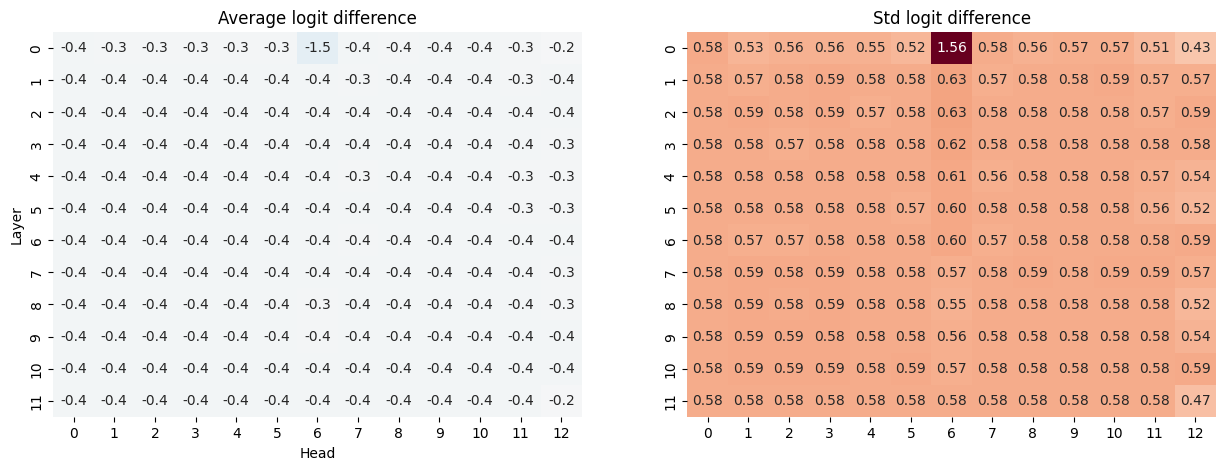

In [14]:
plot_heatmaps((mlp_mem.mean(0) - mlp_cp.mean(0)).abs(), mlp_mem.std(0), title="MLP", interval=5)
plot_heatmaps(mlp_cp.mean(0), mlp_cp.std(0), title="MLP", interval=15)

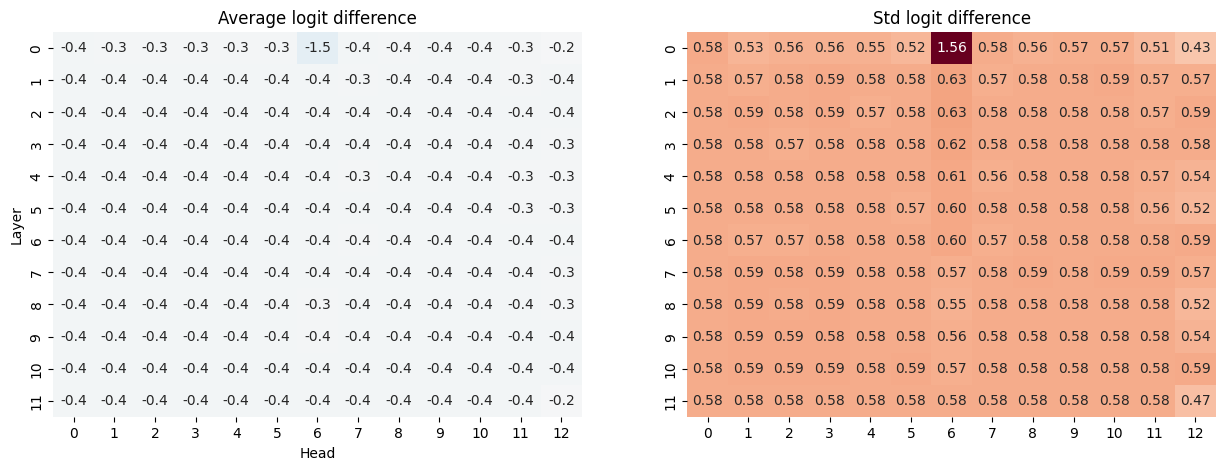

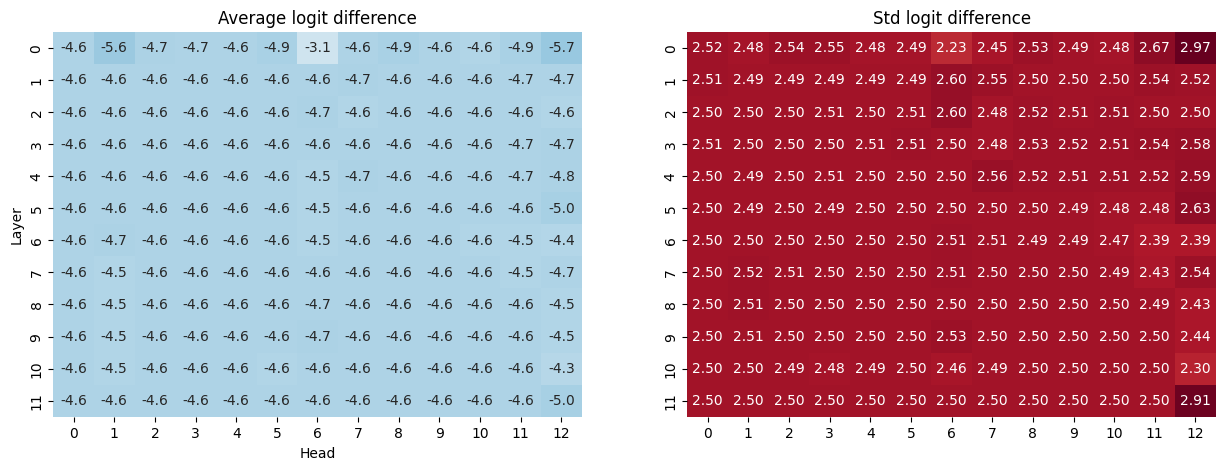

In [15]:
plot_heatmaps((mlp_mem.mean(0) - mlp_cp.mean(0)).abs(), mlp_mem.std(0), title="MLP", interval=5)


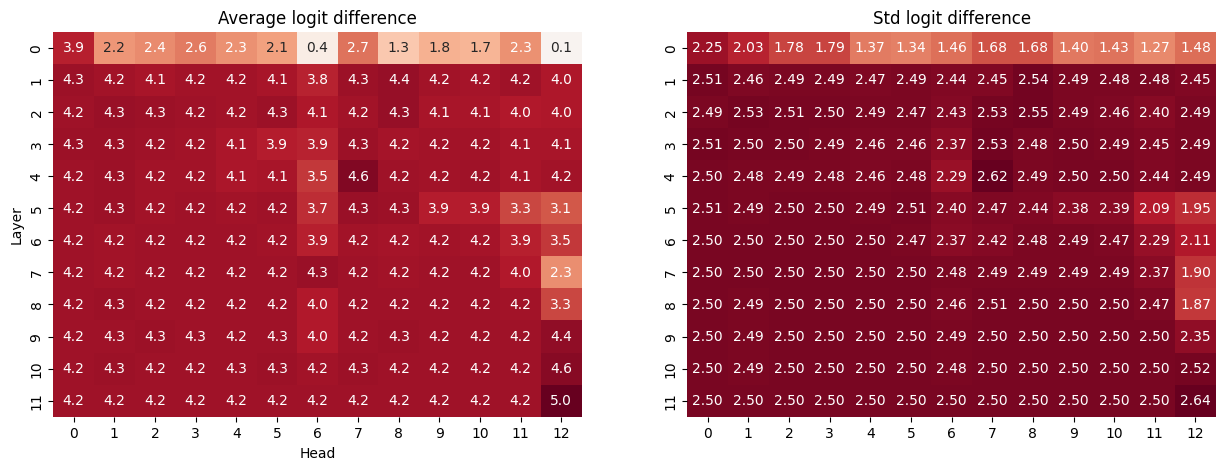

In [18]:
plot_heatmaps((mlp_mem.mean(0) - mlp_cp.mean(0)).abs(), mlp_mem.std(0), title="MLP", interval=5)


In [11]:
logit,cache = model.run_with_cache("ciao")

In [14]:
cache["blocks.0.hook_attn_out"].shape

torch.Size([1, 3, 768])